In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [3]:
df_ml = pd.read_csv('../artifacts/experiment_03/results_ml_models.csv')
df_cnn = pd.read_csv('../artifacts/experiment_03/results_cnn_models.csv')
df_trans = pd.read_csv('../artifacts/experiment_03/results_Transformer_models.csv')

# CNN Models

In [4]:
df_cnn

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val
0,0.466523,0.421795,0.466523,0.438202,0.604250,0.170722,0.173737,HopefullNet,HopefullNet,Motor Imaginary,All,0.635761,0.426256
1,0.447084,0.434711,0.447084,0.438361,0.574351,0.183233,0.183964,EEGNet,EEGNet,Motor Imaginary,All,0.382767,0.439762
2,0.433585,0.419002,0.433585,0.422211,0.558328,0.153511,0.154582,ShallowConvNet,ShallowConvNet,Motor Imaginary,All,0.384250,0.420854
3,0.288337,0.455695,0.288337,0.302066,0.583276,0.123269,0.136354,DeepConvNet,DeepConvNet,Motor Imaginary,All,0.397195,0.286872


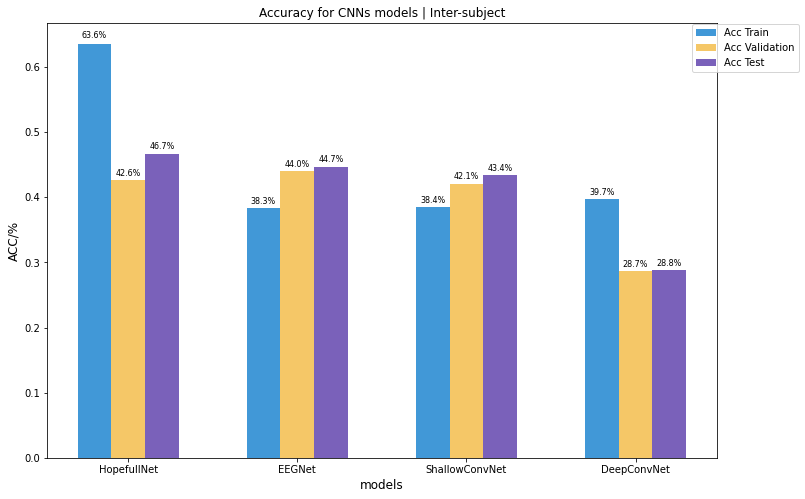

In [9]:
top_1 = df_cnn.iloc[:,-2]
top_3 = df_cnn.iloc[:,-1]
top_5 = df_cnn.iloc[:,0]
xlabels = df_cnn.iloc[:,8]
N = len(df_cnn.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Accuracy for CNNs models | Inter-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=8)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/experiment_03/barplot_cnn.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Machine Learning Models

In [10]:

df_ml['label'] = df_ml.pipeline.replace("time domain features -> wavelet", "TmFq + Wvl") +' + '+ df_ml.model_name
df_ml


,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name,label
0,0.719,0.224683,0.435071,0.224683,0.246711,0.519901,0.059527,0.066450,Motor Imaginary,All subjects,PCA,KNN,PCA + KNN
1,0.665,0.408048,0.416978,0.408048,0.412275,0.585948,0.148392,0.148473,Motor Imaginary,All subjects,PCA,XGB,PCA + XGB
2,0.401,0.450446,0.323600,0.450446,0.353971,0.514440,0.020305,0.025340,Motor Imaginary,All subjects,time domain features -> wavelet,XGB,TmFq + Wvl + XGB
3,0.358,0.358898,0.440261,0.358898,0.386249,0.569101,0.143576,0.147165,Motor Imaginary,All subjects,PCA,SVM,PCA + SVM
4,0.345,0.344585,0.325022,0.344585,0.333247,0.521491,0.021346,0.021450,Motor Imaginary,All subjects,time domain features -> wavelet,SVM,TmFq + Wvl + SVM
5,0.277,0.310019,0.314875,0.310019,0.311868,0.515007,0.003425,0.003431,Motor Imaginary,All subjects,time domain features -> wavelet,KNN,TmFq + Wvl + KNN


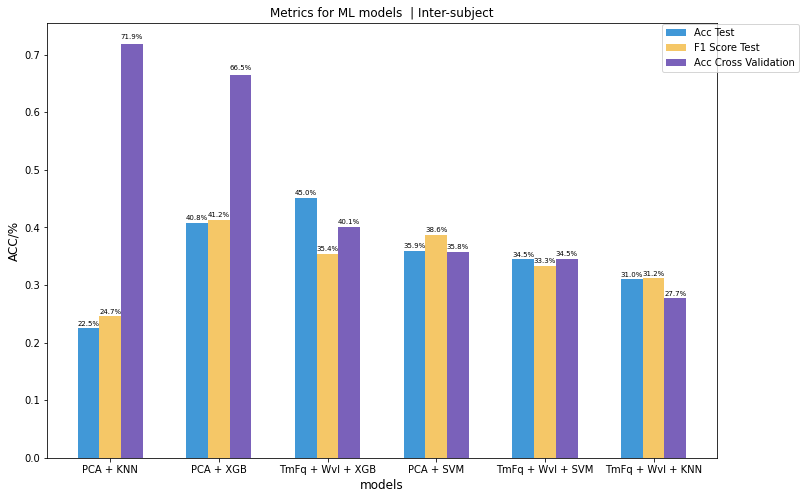

In [11]:
top_1 = df_ml.iloc[:,1]
top_3 = df_ml.iloc[:,4]
top_5 = df_ml.iloc[:,0]
xlabels = df_ml.iloc[:,-1]
N = len(df_ml.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models  | Inter-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Test', 'F1 Score Test','Acc Cross Validation'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/experiment_03/barplot_ml.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Transformers Models

In [10]:
df_trans

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val
0,0.409827,0.444717,0.409827,0.423681,0.568028,0.179144,0.180460,Transformer Pos Enc,Transformer Pos Enc,Motor Imaginary,All,0.489968,0.405186
1,0.383369,0.414624,0.383369,0.376882,0.589783,0.147786,0.157102,Transformer,Transformer,Motor Imaginary,All,0.301052,0.349001


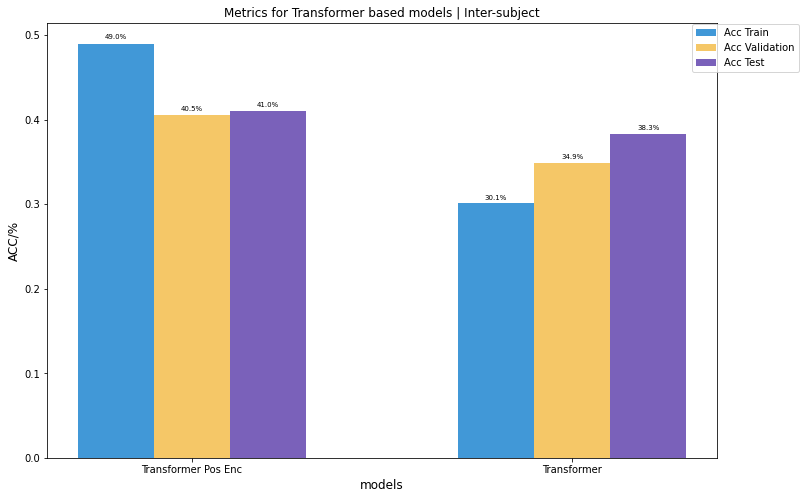

In [12]:
top_1 = df_trans.iloc[:,-2]
top_3 = df_trans.iloc[:,-1]
top_5 = df_trans.iloc[:,0]
xlabels = df_trans.iloc[:,8]
N = len(df_trans.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)

ax.set_title('Metrics for Transformer based models | Inter-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/experiment_03/barplot_trans.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Comparing Models

In [13]:
all_models = pd.concat([
                    df_trans[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_cnn[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_ml[['label','Accuracy']].rename(columns = {'label':'Model'})], axis=0, ignore_index=True)
all_models = all_models.sort_values(['Accuracy'], ascending=False)
all_models.to_csv('../artifacts/experiment_03/results_all_models.csv', index=False, header=True)                    
all_models                    

,Model,Accuracy
2,HopefullNet,0.466523
8,TmFq + Wvl + XGB,0.450446
3,EEGNet,0.447084
4,ShallowConvNet,0.433585
0,Transformer Pos Enc,0.409827
7,PCA + XGB,0.408048
1,Transformer,0.383369
9,PCA + SVM,0.358898
10,TmFq + Wvl + SVM,0.344585
11,TmFq + Wvl + KNN,0.310019


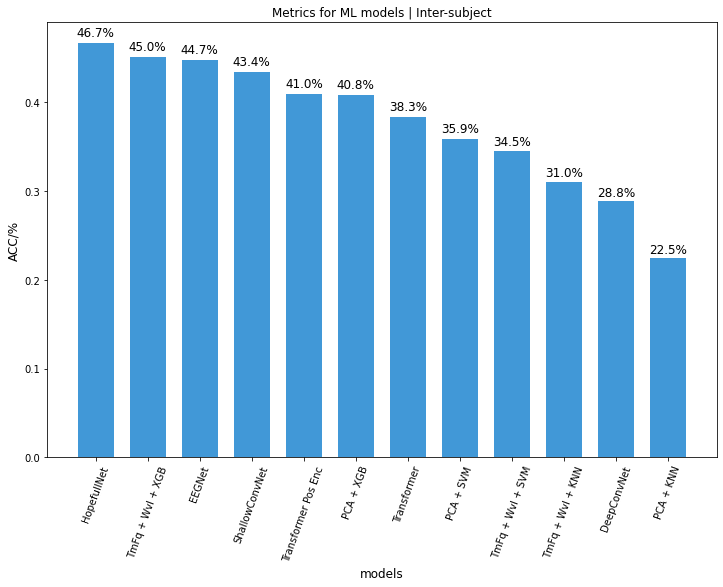

In [14]:
top_1 = all_models.iloc[:,1]
xlabels = all_models.iloc[:,0]
N = len(all_models.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.7      # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models | Inter-subject')
# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.savefig('../artifacts/experiment_03/barplot_all.png',dpi=200, format='png', bbox_inches='tight')
plt.show()